# Titanic Dataset

In this project, I use the [Titanic Dataset](https://www.kaggle.com/c/titanic) from Kaggle to predict whether a passenger survived or not. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## Getting the Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

### Finding missing values

<AxesSubplot:>

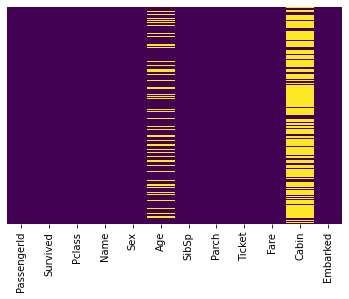

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Plotting label counts

<AxesSubplot:xlabel='Survived', ylabel='count'>

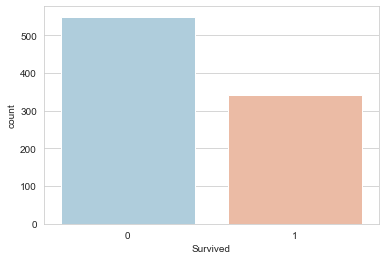

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

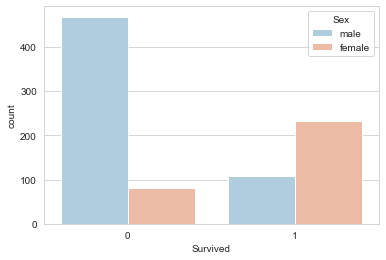

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

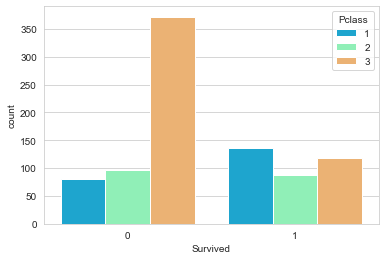

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

### Plotting distributions

<AxesSubplot:xlabel='Age', ylabel='Count'>

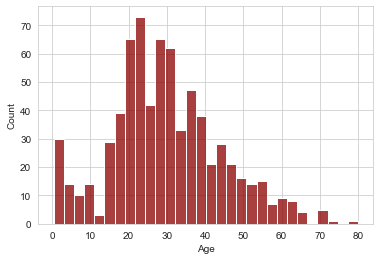

In [10]:
sns.histplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

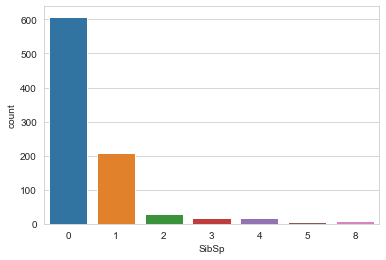

In [11]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

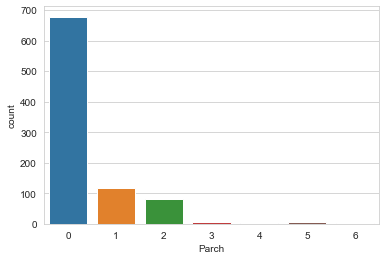

In [12]:
sns.countplot(x='Parch',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

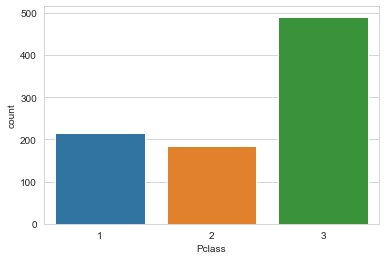

In [13]:
sns.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

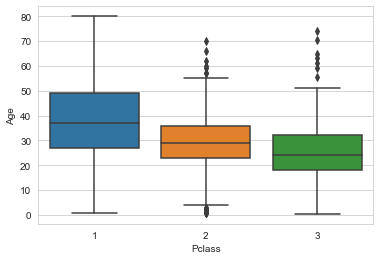

In [14]:
sns.boxplot(data=df,x='Pclass',y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

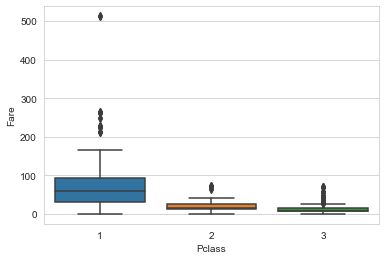

In [15]:
sns.boxplot(data=df,x='Pclass',y='Fare')

### Creating a new column for Title based on the column Name

In [16]:
df['Title'] = df['Name'].apply(lambda x: re.search(r"[a-zA-Z]*\, (.*?)\.",x).group(1))

In [17]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [18]:
pd.pivot_table(data=df,columns='Title',values='Age',aggfunc='mean')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Age,70.0,58.0,40.0,42.0,38.0,48.0,48.5,4.574167,21.773973,24.0,24.0,32.36809,35.898148,28.0,43.166667,49.0,33.0


### Imputing Age based on Title

In [19]:
def impute_age(cols):
    age = cols[0]
    title = cols[1]
    
    if pd.isnull(age):
        newage = pd.pivot_table(data=df,columns='Title',values='Age',aggfunc='mean')[title]
        return newage
    else:
        return age

In [20]:
df['Age'] = df[['Age','Title']].apply(impute_age,axis=1)

In [21]:
df['Title'] = df['Title'].replace(['Ms','Mlle','Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Major','Col','Rev','Dr','Capt'], 'Officer')
df['Title'] = df['Title'].replace(['Sir','Don','Jonkheer','Lady','the Countess','Dona'], 'Royal')

In [22]:
df['Title'].value_counts()

Mr         517
Miss       186
Mrs        125
Master      40
Officer     18
Royal        5
Name: Title, dtype: int64

### Creating a new column IsAlone based on the columns SibSp and Parch

In [23]:
def is_alone(sibsp,parch,name):
    if (sibsp==0) and (parch==0):
        return 1
    else:
        return 0

In [24]:
df['IsAlone'] = df.apply(lambda x: is_alone(x.SibSp,x.Parch,x.Name), axis=1)

In [25]:
pd.pivot_table(data=df,columns='IsAlone',index='Sex',values='Survived',aggfunc='mean')

IsAlone,0,1
Sex,,
female,0.712766,0.785714
male,0.271084,0.155718


<AxesSubplot:>

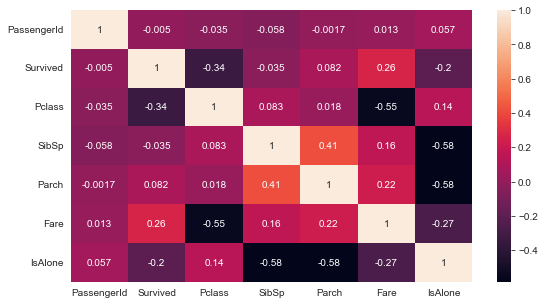

In [26]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True)

### Dropping the column Cabin and the rows with null values

In [27]:
df.drop('Cabin',axis=1,inplace=True)

In [28]:
df.dropna(inplace=True)

### Converting categorical features

In [29]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
title = pd.get_dummies(df['Title'],drop_first=True)

In [30]:
df.drop(['Sex','Embarked','Name','Ticket','Title'],axis=1,inplace=True)

In [31]:
df = pd.concat([df,sex,embark,title],axis=1)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone,male,Q,S,Miss,Mr,Mrs,Officer,Royal
0,1,0,3,22.0,1,0,7.2500,0,1,0,1,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0,0,0


## Building our model

### Train Test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)

### Training and predicting

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()

In [40]:
logmodel.fit(X_train_scaled,y_train)

LogisticRegression()

In [41]:
X_test_scaled = scaler.transform(X_test)

In [42]:
y_pred = logmodel.predict(X_test_scaled)

### Evaluation

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       167
           1       0.77      0.75      0.76       100

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267

